In [ ]:
## Importing Libraries

In [1]:
import struct
import numpy as np

#Function to extract data from ubyte file
def read_idx(filename):
    with open(filename,'rb') as f:
        zero,data_type,dims = struct.unpack('>HBB',f.read(4))
        shape = tuple(struct.unpack('>I',f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(),dtype=np.uint8).reshape(shape)

In [ ]:
## Data Preperation

In [2]:
x_train = read_idx('fashion/train-images-idx3-ubyte')
y_train = read_idx('fashion/train-labels-idx1-ubyte')
x_test = read_idx('fashion/t10k-images-idx3-ubyte')
y_test = read_idx('fashion/t10k-labels-idx1-ubyte')

In [3]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


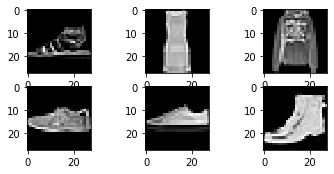

In [4]:
# Let's do the same thing but using matplotlib to plot 6 images 
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

In [5]:
from keras.utils import np_utils
from keras.utils import to_categorical
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
import pandas as pd

Using TensorFlow backend.


In [ ]:
## Model

In [6]:
# Training Parameters
batch_size = 128
epochs = 10

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tensorflow.keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
___________________________

In [ ]:
## Tr

In [7]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 109s 231ms/step - loss: 2.5336 - accuracy: 0.2680 - val_loss: 1.5386 - val_accuracy: 0.4751
Epoch 2/10
469/469 [==============================] - 108s 230ms/step - loss: 1.5709 - accuracy: 0.5013 - val_loss: 0.8831 - val_accuracy: 0.7009
Epoch 3/10
469/469 [==============================] - 104s 221ms/step - loss: 1.2461 - accuracy: 0.6024 - val_loss: 0.7611 - val_accuracy: 0.7334
Epoch 4/10
469/469 [==============================] - 104s 222ms/step - loss: 1.0915 - accuracy: 0.6503 - val_loss: 0.6920 - val_accuracy: 0.7547
Epoch 5/10
469/469 [==============================] - 105s 225ms/step - loss: 0.9854 - accuracy: 0.6795 - val_loss: 0.6460 - val_accuracy: 0.7700
Epoch 6/10
469/469 [==============================] - 99s 212ms/step - loss: 0.9182 - accuracy: 0.7016 - val_loss: 0.6110 - val_accuracy: 0.7833
Epoch 7/10
469/469 [==============================] - 100s 212ms/step - loss: 0.8692 - accuracy: 0.7161 - val_loss: 0.5853 - 

In [27]:
predictions = model.predict_classes(x_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [29]:
y_test_inv_one_hot = np.argmax(y_test, axis=1)

In [31]:
print(classification_report(y_test_inv_one_hot,predictions))

              precision    recall  f1-score   support

           0       0.80      0.76      0.77      1000
           1       0.99      0.94      0.96      1000
           2       0.71      0.69      0.70      1000
           3       0.78      0.88      0.83      1000
           4       0.67      0.73      0.70      1000
           5       0.90      0.90      0.90      1000
           6       0.57      0.46      0.51      1000
           7       0.87      0.89      0.88      1000
           8       0.90      0.94      0.92      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [37]:
df_cm = pd.DataFrame(confusion_matrix(y_test_inv_one_hot,predictions))

Text(195.0, 0.5, 'label (ground truth)')

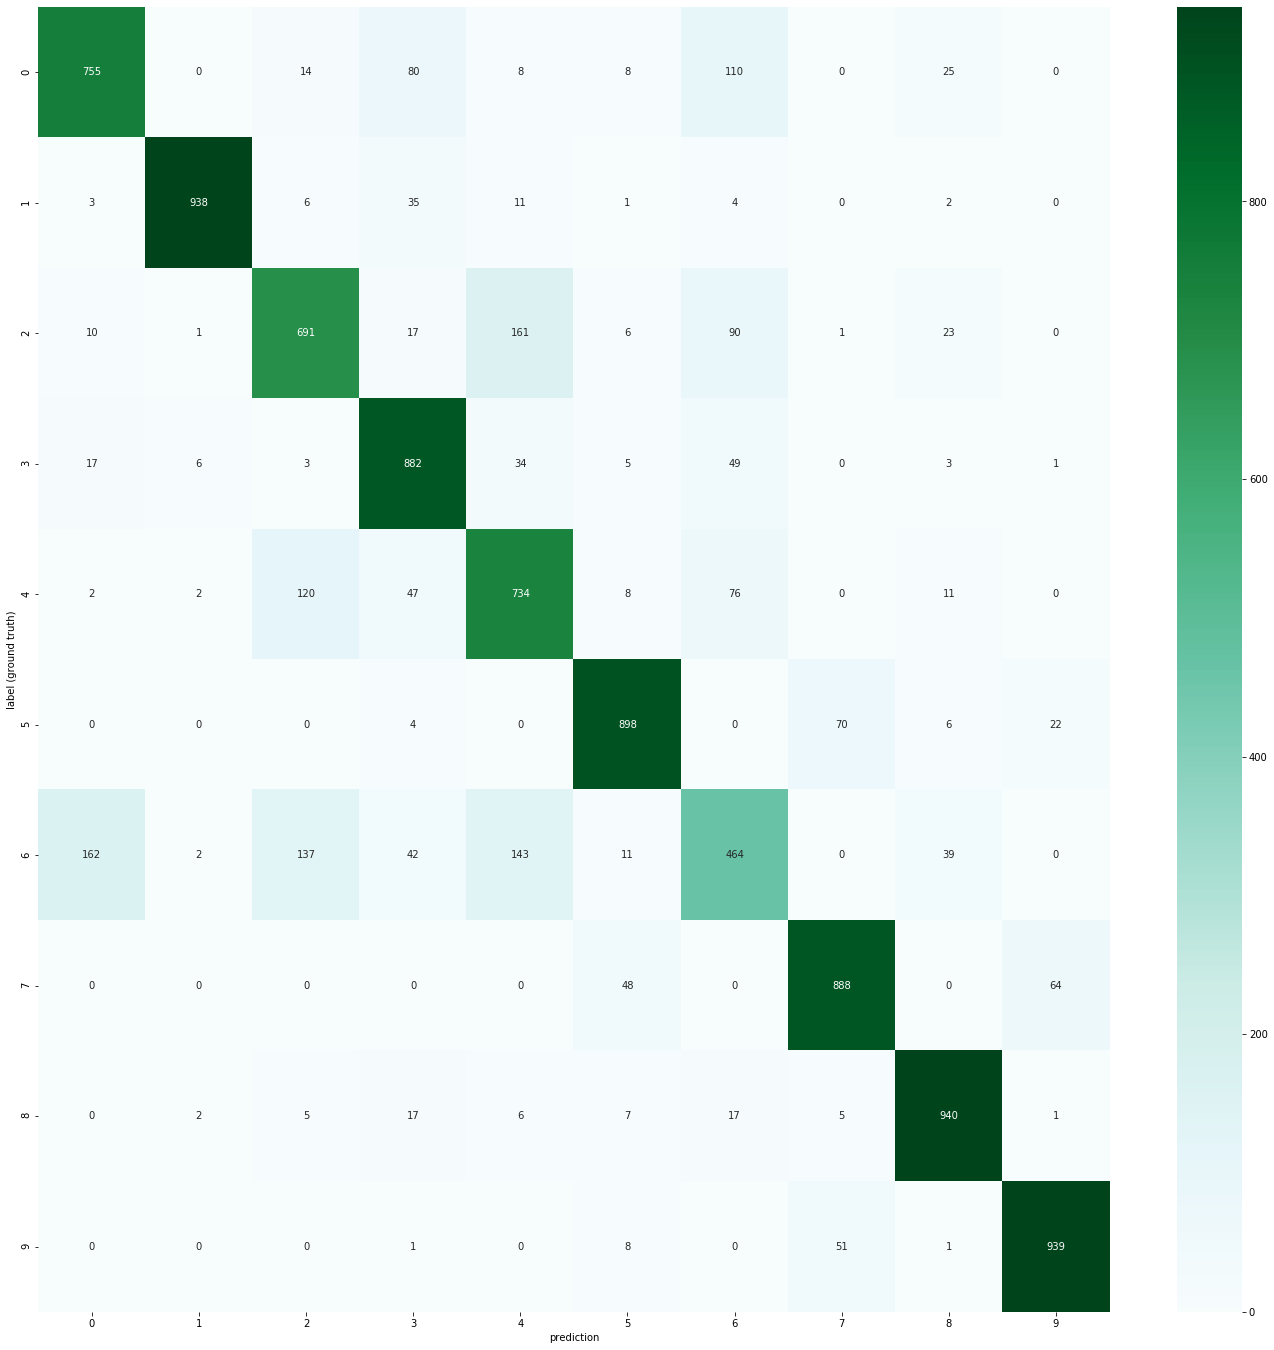

In [40]:
#print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes,y_pred))
plt.figure(figsize=(24,24))
sns.heatmap(df_cm,annot=True,cmap='BuGn',fmt="d")
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")